In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create some sample data (replace this with your dataset)
data = pd.read_csv("ex1data1.txt")  # 100 samples with 3 features
np.set_printoptions(precision=4, suppress=True)
print("Formatted Array:",data)


# Step 2: Standardize the data
numeric_columns = data.select_dtypes(include=[np.number]).columns
mean = np.mean(data[numeric_columns], axis=0)
std_dev = np.std(data[numeric_columns], axis=0)
standardized_data = (data[numeric_columns] - mean) / std_dev

print("Mean along each feature:", mean)
print("Standard deviation along each feature:", std_dev)
print("Standardized data:\n", standardized_data)


Formatted Array:      6.1101    17.592
0    5.5277   9.13020
1    8.5186  13.66200
2    7.0032  11.85400
3    5.8598   6.82330
4    8.3829  11.88600
..      ...       ...
91   5.8707   7.20290
92   5.3054   1.98690
93   8.2934   0.14454
94  13.3940   9.05510
95   5.4369   0.61705

[96 rows x 2 columns]
Mean along each feature: 6.1101    8.181151
17.592    5.716709
dtype: float64
Standard deviation along each feature: 6.1101    3.864166
17.592    5.376723
dtype: float64
Standardized data:
       6.1101    17.592
0  -0.686681  0.634865
1   0.087328  1.477720
2  -0.304840  1.141456
3  -0.600738  0.205811
4   0.052210  1.147407
..       ...       ...
91 -0.597917  0.276412
92 -0.744210 -0.693696
93  0.029049 -1.036350
94  1.349023  0.620897
95 -0.710179 -0.948470

[96 rows x 2 columns]
Formatted Array:      6.1101    17.592
0    5.5277   9.13020
1    8.5186  13.66200
2    7.0032  11.85400
3    5.8598   6.82330
4    8.3829  11.88600
..      ...       ...
91   5.8707   7.20290
92   5.3054   

In [12]:
# Step 3: Compute the covariance matrix
covariance_matrix = np.cov(standardized_data, rowvar=False)
size_cc = covariance_matrix.size
shape_cc = covariance_matrix.shape
print (size_cc, shape_cc)
print(covariance_matrix)

4 (2, 2)
[[1.0105 0.8813]
 [0.8813 1.0105]]
4 (2, 2)
[[1.0105 0.8813]
 [0.8813 1.0105]]


In [13]:
# Step 4: Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
print(eigenvalues)
print(eigenvectors)

[0.1292 1.8919]
[[-0.7071  0.7071]
 [ 0.7071  0.7071]]
[0.1292 1.8919]
[[-0.7071  0.7071]
 [ 0.7071  0.7071]]


In [14]:
# Step 5: Sort eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print(eigenvalues)
print(eigenvectors)

[1.8919 0.1292]
[[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]
[1.8919 0.1292]
[[ 0.7071 -0.7071]
 [ 0.7071  0.7071]]


In [15]:
# Step 6: Choose the number of components (or a threshold for explained variance)
n_components = 2  # Choose the number of principal components


In [16]:
# Step 7: Select the top 'n_components' eigenvectors
selected_eigenvectors = eigenvectors[:, :n_components]

In [17]:
# Step 8: Project the data onto the selected eigenvectors to obtain the principal components
final_result = np.dot(standardized_data, selected_eigenvectors)

In [18]:
# Step 9: Print the final result
print("Final Result after PCA:")
print(final_result)


Final Result after PCA:
[[-0.0366  0.9345]
 [ 1.1067  0.9832]
 [ 0.5916  1.0227]
 [-0.2793  0.5703]
 [ 0.8483  0.7744]
 [-0.3089 -0.051 ]
 [ 0.899   0.7537]
 [-0.1942  0.4262]
 [-0.822   0.3222]
 [-0.7762  0.128 ]
 [ 2.3821  0.1925]
 [-0.7847  0.1109]
 [ 0.24    0.1569]
 [-1.1225 -0.1928]
 [-0.8025  0.2229]
 [-0.3864  0.2781]
 [-1.2364 -0.1198]
 [-0.5921  0.049 ]
 [-0.2462  0.1601]
 [-0.7036  0.0255]
 [ 4.323  -0.1013]
 [-0.6836  0.3013]
 [-0.4091  0.2699]
 [-0.8252  0.1323]
 [ 4.195   0.2557]
 [ 1.8741  0.1734]
 [ 0.6829 -0.333 ]
 [ 2.0944  0.2664]
 [ 4.9897 -0.1421]
 [-1.4482 -0.3763]
 [-0.2545  0.3281]
 [ 1.0392  0.6487]
 [-0.9275 -0.0897]
 [ 0.1141  0.1031]
 [-0.1972 -0.1065]
 [-0.2261 -0.1949]
 [-0.7768  0.1656]
 [ 1.4305 -0.2731]
 [-0.3633  0.3056]
 [-1.1863 -0.171 ]
 [-0.475   0.0002]
 [ 0.6018 -0.689 ]
 [-0.8714  0.0097]
 [ 0.0683  0.1987]
 [-0.8133 -0.4151]
 [-0.6459  0.4926]
 [-0.9448 -0.0738]
 [ 0.9448 -0.3431]
 [-1.101  -0.1349]
 [ 0.0187  0.2532]
 [-1.0357  0.0159]
 [-0.32

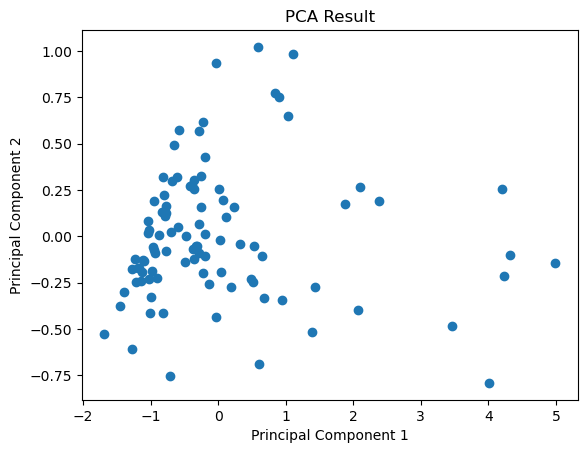

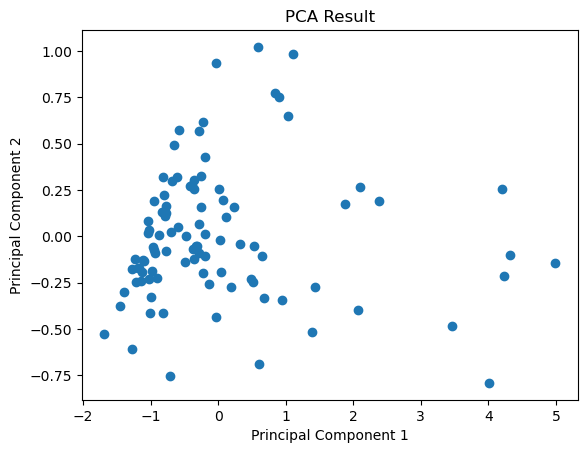

In [19]:
# Step 10: Visualize the results (for 2D data)
if n_components == 2:
    plt.scatter(final_result[:, 0], final_result[:, 1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Result')
    plt.show()